In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1.7 
## (a) 使用有限差分格式

In [3]:
def derivative_forward(f, x, h):
    tmp = (f(x + h) - f(x)) / h
    return tmp

In [4]:
num_pts = 16
x = 1
f = np.tan
def f_derivative(x):
    tmp = 1/np.cos(x)**2
    return tmp

In [5]:
h_list = [0.1**(i) for i in range(num_pts)]
# error = np.zeros(shape=(num_pts,))

In [6]:
error = [np.abs(derivative_forward(f,x,h)-f_derivative(x)) for h in h_list]
error

[7.16796640873118,
 0.6480005051227411,
 0.054311135652046705,
 0.0053443964975810054,
 0.000533587467105967,
 5.3350263768070505e-05,
 5.334627855901886e-06,
 5.340234974227087e-07,
 2.554135170029781e-08,
 1.587681146553166e-07,
 1.1734995148948713e-06,
 1.4496175810840839e-05,
 0.00018534396862168734,
 0.003811458920028876,
 0.006031904969279633,
 0.34923946291077]

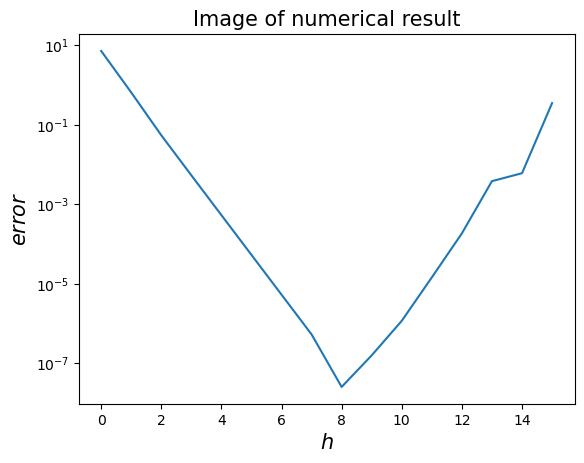

In [7]:
plt.yscale("log")
# plt.xscale("log")
plt.plot(range(num_pts),error)
plt.xlabel(r"$h$", fontsize=15)
plt.ylabel(r"$error$", fontsize=15)

plt.title("Image of numerical result", fontsize=15)
plt.savefig("./pro1a.png")
plt.show()

大约在$10^{-8}$取到最小值，h满足$h\approx\sqrt{\varepsilon_{{mach}}}$。

## (b) 使用中心差分格式

In [9]:
def derivative_centered(f, x, h):
    tmp = (f(x + h) - f(x - h)) / (2 * h)
    return tmp

In [10]:
error_c = [np.abs(derivative_centered(f,x,h)-f_derivative(x)) for h in h_list]
error_c

[4.518038752445518,
 0.09748837767680651,
 0.00094533926864937,
 9.450528698717875e-06,
 9.450396643018166e-08,
 9.49912593029012e-10,
 1.0479972445409658e-10,
 6.222578008419077e-12,
 3.336891207794679e-09,
 4.774581219280094e-08,
 6.327649026971471e-08,
 3.3939455645892735e-06,
 7.432166615917168e-05,
 0.0015910128707785631,
 0.006031904969279633,
 0.23821716044825436]

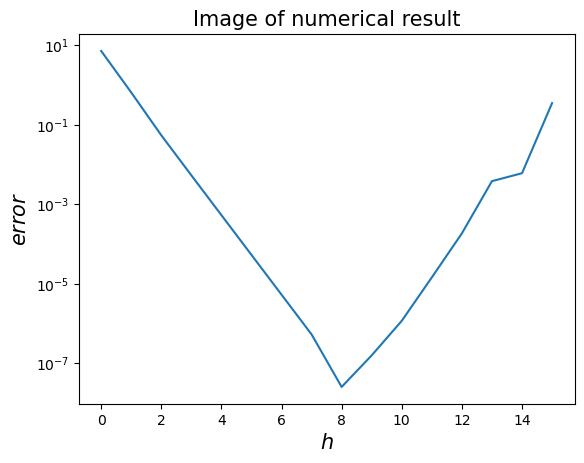

In [11]:
plt.yscale("log")
# plt.xscale("log")
plt.plot(range(num_pts),error)
plt.xlabel(r"$h$", fontsize=15)
plt.ylabel(r"$error$", fontsize=15)

plt.title("Image of numerical result", fontsize=15)
plt.savefig("./pro1b.png")
plt.show()

大约在$10^{-8}$取到最小值。

# 1.9
## (a)

In [ ]:
def num_exp(x, n):
    x = np.array(x, dtype=np.float64)
    if n == 0:
        return 1
    tmp = 1
    for i in range(n):
        tmp += (x ** (i + 1)) / np.math.factorial(i + 1)
    return tmp


In [8]:
num_exp(1,100)

2.7182818284590455

## (b)

In [17]:
x_list = [-20,-15,-10,-5,-1,1,5,10,15,20]
def print_stop_pt(x):
    for i in range(10000):
        error = num_exp(x,i+1)-num_exp(x,i)
        # print(error.dtype)
        if error == 0:
            print("When x = %d ,stopping in n=" % x,i)
            break
for x in x_list:
    print_stop_pt(x)

When x = -20 ,stopping in n= 95
When x = -15 ,stopping in n= 76
When x = -10 ,stopping in n= 58
When x = -5 ,stopping in n= 38
When x = -1 ,stopping in n= 18
When x = 1 ,stopping in n= 17
When x = 5 ,stopping in n= 32
When x = 10 ,stopping in n= 45
When x = 15 ,stopping in n= 57
When x = 20 ,stopping in n= 67


## (c)

In [13]:
Error_list = []
for x in x_list:
    result = num_exp(x,100)
    error = np.exp(x) - result
    Error_list.append(abs(error))
    print("When x = %d ,result is %f, error with built-in exp(%d) is %f" % (x,result,x,error))

When x = -20 ,result is 0.000000, error with built-in exp(-20) is 0.000000
When x = -15 ,result is 0.000000, error with built-in exp(-15) is -0.000000
When x = -10 ,result is 0.000045, error with built-in exp(-10) is 0.000000
When x = -5 ,result is 0.006738, error with built-in exp(-5) is -0.000000
When x = -1 ,result is 0.367879, error with built-in exp(-1) is -0.000000
When x = 1 ,result is 2.718282, error with built-in exp(1) is -0.000000
When x = 5 ,result is 148.413159, error with built-in exp(5) is 0.000000
When x = 10 ,result is 22026.465795, error with built-in exp(10) is 0.000000
When x = 15 ,result is 3269017.372472, error with built-in exp(15) is 0.000000
When x = 20 ,result is 485165195.409790, error with built-in exp(20) is 0.000000


由上面可见，对于$x<0$的情况也可以计算。

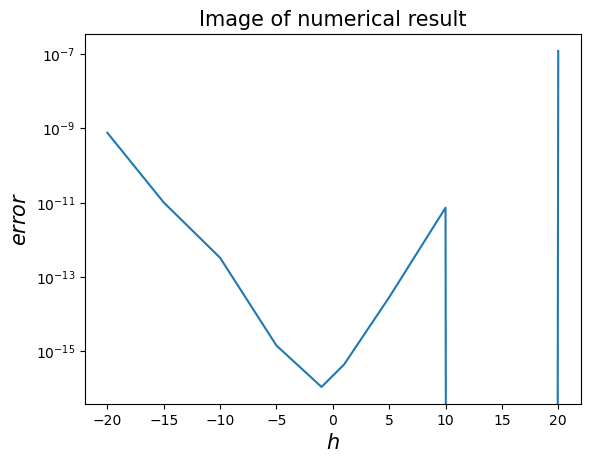

In [14]:
plt.yscale("log")
# plt.xscale("log")
plt.plot(x_list,Error_list)
plt.xlabel(r"$h$", fontsize=15)
plt.ylabel(r"$error$", fontsize=15)

plt.title("Image of numerical result", fontsize=15)
plt.savefig("./pro2c.png")
plt.show()

## (d) 

先对相邻两项做差在求和。

In [27]:
def num_exp_neg(x,n=1000):
    x = np.array(x, dtype=np.float64)
    if n == 0:
        return 1
    tmp = 1
    for i in range(n):
        tmp_term_1 = (x ** (2*i+1)) / np.math.factorial(2*i+1)
        tmp_term_2 = (x ** (2*i+2)) / np.math.factorial(2*i+2)
        tmp_term = tmp_term_1+tmp_term_2
        if abs(tmp_term) < 10e-15:
            return tmp
        tmp += tmp_term
    return tmp

In [28]:
num_exp_neg(-1)

0.36787944117144494

In [33]:
x_list = [-20,-15,-10,-5,-1,1,5,10,15,20]
def print_stop_pt(x):
    for i in range(10000):
        error = num_exp_neg(x,i+1)-num_exp_neg(x,i)
        # print(error.dtype)
        if error == 0:
            print("When x = %d ,stopping in n=" % x,i)
            break
for x in x_list:
    print_stop_pt(x)

When x = -20 ,stopping in n= 9
When x = -15 ,stopping in n= 32
When x = -10 ,stopping in n= 4
When x = -5 ,stopping in n= 17
When x = -1 ,stopping in n= 8
When x = 1 ,stopping in n= 8
When x = 5 ,stopping in n= 17
When x = 10 ,stopping in n= 23
When x = 15 ,stopping in n= 29
When x = 20 ,stopping in n= 34


与之前程序相比，误差有降低。

# Problem2 in homework1

首先写一个程序计算"eig", "x=A\b", "x=A^(-1)*b"三种运算的time cost，这里由于使用matlab，只放上源代码和结果：

```matlab
n = [500, 1000, 2000, 4000, 8000];
T1 = [];
T2 = [];
T = [];
for k=1:5
 B = rand(n(k), n(k));
 b = rand(n(k), 1);
 A = B' * B;
 t = time_cost_eig(A);
 [t1, t2] = time_cost_solve_equ(A, b);
 T1 = [T1, t1];
 T2 = [T2, t2];
 T = [T, t];
end

```

Output:

历时 0.019935 秒。
历时 0.006939 秒。
历时 0.009285 秒。
历时 0.040861 秒。
历时 0.010021 秒。
历时 0.024429 秒。
历时 0.326596 秒。
历时 0.035293 秒。
历时 0.101721 秒。
历时 1.094960 秒。
历时 0.182774 秒。
历时 0.693232 秒。
历时 7.162076 秒。
历时 1.089582 秒。
历时 5.806978 秒。


```matlab
%画图程序：
plot(n, T)
title('用eig(A)函数求特征值的时间消耗')
ylabel('时间消耗，单位：秒')

```

![/home/zhuyekun/data/Scientific-Computing/hw1/pro3.JPG](/home/zhuyekun/data/Scientific-Computing/hw1/pro3.JPG)

```matlab
%画图程序
plot(n, T1, n, T2)
title('用两种方法计算Ax=b的解的时间消耗')
ylabel('时间消耗，单位：秒')
legend({'A\\b','A\^(-1)b'}, 'Location', 'northwest')
```

![/home/zhuyekun/data/Scientific-Computing/hw1/pro3.JPG](./pro3_2.JPG)